In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Homework 3
## Problem 1

For a 2-link arm, assume

- Upper arm length: $l_1 = 0.34 ~\textrm{m}$
- Forearm length: $l_2 = 0.46 ~\textrm{m}$
- Hand position: $x = (0.36, 0.65)$ in $\textrm{m}$
- Hand velocity: $\dot{x} = (−3.89, 1.30)$ in $\textrm{m/s}$
- Hand acceleration: $\ddot{x} = (−7.79, −26.18)$ in $\textrm{m/s$^2$}$

In [2]:
H = np.array([0.36,  0.65])
l = np.array([0.34, 0.46])
Hdot = np.array([-3.89, 1.30])
Hddot = np.array([-7.79, -26.18])

### a: The Jacobian

Work through the derivaitves by hand to find $J(\theta)$ and $\dot{J}(\theta)$.

#### Solution

\begin{equation}
J\left( \theta  \right) = \left( {\begin{array}{*{20}{c}}
{\frac{{\partial {H_x}}}{{\partial {\theta _s}}}}&{\frac{{\partial {H_x}}}{{\partial {\theta _e}}}}\\
{\frac{{\partial {H_y}}}{{\partial {\theta _s}}}}&{\frac{{\partial {H_y}}}{{\partial {\theta _e}}}}
\end{array}} \right)
\end{equation}
\begin{equation}
{} = \left( {\begin{array}{*{20}{c}}
{\frac{\partial }{{\partial {\theta _s}}}{l_1}\cos {\theta _s} + {l_2}\cos \left( {{\theta _s} + {\theta _e}} \right)}&{\frac{\partial }{{\partial {\theta _e}}}{l_1}\cos {\theta _s} + {l_2}\cos \left( {{\theta _s} + {\theta _e}} \right)}\\
{\frac{\partial }{{\partial {\theta _s}}}{l_1}\sin {\theta _s} + {l_2}\sin \left( {{\theta _s} + {\theta _e}} \right)}&{\frac{\partial }{{\partial {\theta _e}}}{l_1}\sin {\theta _s} + {l_2}\sin \left( {{\theta _s} + {\theta _e}} \right)}
\end{array}} \right)
\end{equation}
\begin{equation}
{} = \left( {\begin{array}{*{20}{c}}
{ - {l_1}\sin {\theta _s} - {l_2}\sin \left( {{\theta _s} + {\theta _e}} \right)}&{ - {l_2}\sin \left( {{\theta _s} + {\theta _e}} \right)}\\
{{l_1}\cos {\theta _s} + {l_2}\cos \left( {{\theta _s} + {\theta _e}} \right)}&{{l_2}\cos \left( {{\theta _s} + {\theta _e}} \right)}
\end{array}} \right)
\end{equation}

In [3]:
def calc_J(theta, l):
    return np.array([
        [-l[0]*np.sin(theta[0]-l[1]*np.sin(sum(theta))), -l[1]*np.sin(sum(theta))],
        [-l[0]*np.cos(theta[0]-l[1]*np.cos(sum(theta))), -l[1]*np.cos(sum(theta))]
    ])

### b: Inverse kinematics

Use Python (or other program) to calculate numerically the joint angle
in degrees, angular
velocity in deg/s, and angular acceleration in deg/s$^2$.

#### Solution

##### Joint angles

In [4]:
# Equation for applying cosine rule to find an angle
def angle_c_from_cosine_rule(a, b, c):
    cos_c = (a**2 + b**2 - c**2)/(2*a*b)
    return np.arccos(cos_c)

# Find joint angles using trignometry
def calc_theta(H, l):
    c = np.linalg.norm(H)
    gamma = np.arccos(H[0]/c)
    alpha = angle_c_from_cosine_rule(l[0], c, l[1])
    beta = angle_c_from_cosine_rule(l[0], l[1], c)
    return np.array([gamma-alpha, np.pi-beta])

theta = calc_theta(H, l)
print(f'Shoulder angle: {theta[0]*180/np.pi:.1f}\N{DEGREE SIGN}')
print(f'Elbow angle: {theta[1]*180/np.pi:.1f}\N{DEGREE SIGN}')

Shoulder angle: 35.5°
Elbow angle: 44.0°


##### Joint velocities

$\dot \theta  = {J^{ - 1}}\left( \theta  \right)\dot H$

In [5]:
def calc_theta_dot(H, Hdot, l):
    theta = calc_theta(H, l)
    J = calc_J(theta, l)
    invJ = np.linalg.inv(J)
    return invJ @ Hdot

theta_dot = calc_theta_dot(H, Hdot, l)

print(f'Shoulder angular velocity: {theta_dot[0]*180/np.pi:.1f} deg/sec')
print(f'Elbow angular velocity: {theta_dot[1]*180/np.pi:.1f} deg/sec')

Shoulder angular velocity: -410.1 deg/sec
Elbow angular velocity: 544.2 deg/sec


##### Joint acceleration

$\ddot \theta  = {J^{ - 1}}\left( \theta  \right)
\left( {\ddot H - \dot J\left( \theta  \right)\dot \theta } \right)$

To do this, we need to find $\dot J(\theta)$

$\dot J\left( \theta  \right)  = \frac{\partial }{{\partial {\theta _s}}}J\left( \theta  \right)\frac{{d{\theta _s}}}{{dt}} + \frac{\partial }{{\partial {\theta _e}}}J\left( \theta  \right)\frac{{d{\theta _e}}}{{dt}}$

Using the equation for $J(\theta)$ derived above, we have:

\begin{equation}
\frac{\partial }{{\partial {\theta _s}}}J\left( \theta  \right) = \left( {\begin{array}{*{20}{c}}
  { - {l_1}\cos {\theta _s} - {l_2}\cos \left( {{\theta _s} + {\theta _e}} \right)}&{ - {l_2}\cos \left( {{\theta _s} + {\theta _e}} \right)} \\
  { - {l_1}\sin {\theta _s} - {l_2}\sin \left( {{\theta _s} + {\theta _e}} \right)}&{ - {l_2}\sin \left( {{\theta _s} + {\theta _e}} \right)}
\end{array}} \right)
\end{equation}

\begin{equation}
\frac{\partial }{{\partial {\theta _e}}}J\left( \theta  \right) = \left( {\begin{array}{*{20}{c}}
  { - {l_2}\cos \left( {{\theta _s} + {\theta _e}} \right)}&{ - {l_2}\cos \left( {{\theta _s} + {\theta _e}} \right)} \\
  { - {l_2}\sin \left( {{\theta _s} + {\theta _e}} \right)}&{{l_2}\sin \left( {{\theta _s} + {\theta _e}} \right)}
\end{array}} \right)
\end{equation}

And thus:

\begin{equation}
\dot J\left( \theta  \right) = \left( {\begin{array}{*{20}{c}}
  { - {l_1}\cos {\theta _s}{{\dot \theta }_s} - {l_2}\cos \left( {{\theta _s} + {\theta _e}} \right)\left( {{{\dot \theta }_s} + {{\dot \theta }_e}} \right)}&{ - {l_2}\cos \left( {{\theta _s} + {\theta _e}} \right)\left( {{{\dot \theta }_s} + {{\dot \theta }_e}} \right)} \\
  { - {l_1}\sin {\theta _s}{{\dot \theta }_s} - {l_2}\sin \left( {{\theta _s} + {\theta _e}} \right)\left( {{{\dot \theta }_s} + {{\dot \theta }_e}} \right)}&{ - {l_2}\sin \left( {{\theta _s} + {\theta _e}} \right)\left( {{{\dot \theta }_s} + {{\dot \theta }_e}} \right)}
\end{array}} \right)
\end{equation}

In [6]:
def calc_Jdot(theta, theta_dot, l):
    return np.array([
        [-l[0]*np.cos(theta[0])*theta_dot[0]-l[1]*np.cos(sum(theta))*sum(theta_dot), -l[1]*np.cos(sum(theta))*sum(theta_dot)],
        [-l[0]*np.sin(theta[0])*theta_dot[0]-l[1]*np.sin(sum(theta))*sum(theta_dot), -l[1]*np.sin(sum(theta))*sum(theta_dot)]
    ])

def calc_theta_ddot(H, Hdot, Hddot, l):
    theta = calc_theta(H, l)
    theta_dot = calc_theta_dot(H, Hdot, l)
    J = calc_J(theta, l)
    invJ = np.linalg.inv(J)
    Jdot = calc_Jdot(theta, theta_dot, l)
    return invJ @ (Hddot - Jdot @ theta_dot)

theta_ddot = calc_theta_ddot(H, Hdot, Hddot, l)

print(f'Shoulder angular acceleration: {theta_ddot[0]*180/np.pi:.1f} deg/sec^2')
print(f'Elbow angular acceleration: {theta_ddot[1]*180/np.pi:.1f} deg/sec^2')

Shoulder angular acceleration: 3018.2 deg/sec^2
Elbow angular acceleration: -1245.5 deg/sec^2


### c: Forward kinematics

Starting with your answers in part (b), calculate the forward kinematics to
get hand position, velocity and acceleration. Compare your results to the original values.

#### Hand position

In [7]:
def calc_H(theta, l):
    return np.array([
        l[0]*np.cos(theta[0])+l[1]*np.cos(sum(theta)),
        l[0]*np.sin(theta[0])+l[1]*np.sin(sum(theta))
    ])


H1 = calc_H(theta, l)

print(f'Original hand position is ({H[0]:.2f}, {H[1]:.2f})')
print(f'Ater inverse and forward kinematics we get: ({H1[0]:.2f}, {H1[1]:.2f})')

Original hand position is (0.36, 0.65)
Ater inverse and forward kinematics we get: (0.36, 0.65)


#### Hand velocity

In [8]:
def calc_Hdot(theta, theta_dot, l):
    J = calc_J(theta, l)
    return J @ theta_dot

H1dot = calc_Hdot(theta, theta_dot, l)

print(f'Original hand velocity is ({Hdot[0]:.2f}, {Hdot[1]:.2f})')
print(f'Ater inverse and forward kinematics we get: ({H1dot[0]:.2f}, {H1dot[1]:.2f})')

Original hand velocity is (-3.89, 1.30)
Ater inverse and forward kinematics we get: (-3.89, 1.30)


#### Hand acceleration

In [9]:
def calc_Hddot(theta, theta_dot, theta_ddot, l):
    J = calc_J(theta, l)
    Jdot = calc_Jdot(theta, theta_dot, l)
    return Jdot @ theta_dot + J @ theta_ddot

H1ddot = calc_Hddot(theta, theta_dot, theta_ddot, l)

print(f'Original hand acceleration is ({Hddot[0]:.2f}, {Hddot[1]:.2f})')
print(f'Ater inverse and forward kinematics we get: ({H1ddot[0]:.2f}, {H1ddot[1]:.2f})')

Original hand acceleration is (-7.79, -26.18)
Ater inverse and forward kinematics we get: (-7.79, -26.18)


## Problem 2

### a: Simulate dynamics of two joint arm

Following the equations of motion defined in class, simulate the dynamics a two-link arm
of 4 sec. Plot the trajectory in the x/y plane and the x and y velocities as functions of time.

Use a time step of $1~\textrm{msec}$ and a total simulation time of
$4~\textrm{sec}$.

Use the following constants for the arm:

*Upper arm*

- Mass: $m_1 = 2.1~\textrm{kg}$
- Moment of inertia: $I_1 = 0.025~\textrm{N s$^2$}$
- Length: $l_1 = 0.3384~\textrm{m}$
- Center of mass: $r_1 = 0.1692~\textrm{m}$

*Lower arm*

- Mass: $m_2 = 1.65~\textrm{kg}$
- Moment of inertia: $I_2 = 0.075~\textrm{N s$^2$}$
- Length: $l_2 = 0.4554~\textrm{m}$
- Center of mass: $r_2 = 0.2277~\textrm{m}$

- Gravitational constant: $g = 9.81~\textrm{m/s$^2$}$
- Shoulder muscle torque: $\tau_s = 0$
- Elbow mucle torque: $\tau_e = 0$

And initial conditions:

- $\theta_s = 180^{\circ}$
- $\theta_e = 1^{\circ}$
- $\dot{\theta}_s = 0^{\circ} / s$
- $\dot{\theta}_e = 0^{\circ} / s$

#### Solution

##### Set up constants

In [10]:
m = np.array([2.1, 1.65])
I = np.array([0.0025, 0.0075])
l = np.array([0.3384, 0.4554])
r = np.array([0.1692, 0.2277])
g = 9.81
tau_m = np.array([0, 0])

theta_0 = np.array([180, 1])*np.pi/180
theta_dot_0 = np.array([0, 0])

dt = 5e-6
T = 4

##### Define function for inertia matrix

\begin{equation}
M = \left( {\begin{array}{*{20}{c}}
  {{I_1} + {I_2} + {m_1}r_1^2 + {m_2}\left( {l_1^2 + r_2^2 + 2{l_1}{r_2}\cos {\theta _e}} \right)}&{{I_2} + {m_2}\left( {r_2^2 + {l_1}{r_2}\cos {\theta _e}} \right)} \\
  {{I_2} + {m_2}\left( {r_2^2 + {l_1}{r_2}\cos {\theta _e}} \right)}&{{I_2} + {m_2}r_2^2}
\end{array}} \right)
\end{equation}

In [11]:
def calc_M(theta, m, l, r, I):
    I11 = I[0]+I[1]+m[0]*r[0]**2+m[1]*(l[0]**2+r[1]**2+2*l[0]*r[1]*np.cos(theta[1]))
    I12 = I[1]+m[1]*(r[1]**2+l[0]*r[1]*np.cos(theta[1]))
    I22 = I[1]+m[1]*r[1]**2
    return np.array([[I11, I12], [I12, I22]])

M_0 = calc_M(theta_0, m, l, r, I)

##### Define function for coriolis matrix

\begin{equation}
C = {l_1}{m_2}{r_2}\sin {\theta _e}\left( {\begin{array}{*{20}{c}}
  0&{ - 2{{\dot \theta }_s} - {{\dot \theta }_e}} \\
  {{{\dot \theta }_s}}&0
\end{array}} \right)
\end{equation}

In [12]:
def calc_C(theta, theta_dot, m, l, r):
    return l[0]*m[1]*r[1]*np.sin(theta[1])*np.array([
        [0, -2*theta_dot[0]-theta_dot[1]],
        [theta_dot[0], 0]])

C_0 = calc_C(theta_0, theta_dot_0, m, l, r)

##### Define function for gravitational matrix

\begin{equation}
G = g\left( {\begin{array}{*{20}{c}}
  {\left( {{m_2}{l_1} + {m_1}{r_1}} \right)\sin {\theta _e} + {m_2}{r_2}\sin \left( {{\theta _s} + {\theta _e}} \right)} \\
  {{m_2}{r_2}\sin \left( {{\theta _s} + {\theta _e}} \right)}
\end{array}} \right)
\end{equation}

In [13]:
def calc_G(theta, m, l, r, g):
    return g*np.array([
        [(m[1]*l[0]+m[0]*r[0])*np.sin(theta[1]) + m[1]*r[1]*np.sin(sum(theta))],
        [m[1]*r[1]*np.sin(sum(theta))]
    ]).reshape(2)

G_0 = calc_G(theta_0, m, l, r, g)

##### Calculate angular acceleration from state

\begin{equation}
\ddot{\theta} = M^{-1}(\tau - C \dot{\theta} - G)
\end{equation}

In [14]:
def calc_theta_ddot_dynamics(tau_m, theta, theta_dot, m, l, r, I, g):
    M = calc_M(theta, m, l, r, I)
    C = calc_C(theta, theta_dot, m, l, r)
    G = calc_G(theta, m, l, r, g)
    return np.linalg.inv(M)@(tau_m -(C @ theta_dot) - G)
    # return theta_ddot.reshape(2)

theta_ddot_0 = calc_theta_ddot_dynamics(tau_m, theta_0, theta_dot_0, m, l, r, I, g)

###### Movement constraints

Let's think about our coordinate axes. Looking at the trignometry that was used to derive our equations in the lecture slides we see that shoulder pointing up is $\theta_{s} = 180^{\circ}$ and shoulder pointing straight down is $\theta_{s} = 0^{\circ}$. Elbow open is $\theta_{e} = 0^{\circ}$ and elbow closed is $\theta_e = 180^{\circ}$.

We'll limit the shoulder angle to go between a little past straight up ($190^{\circ}$) and well past all the way down ($-60^{\circ}$).

We'll limit the elbow angle to go between fully opn ($0^{\circ}$) and almost fully closed ($170^{\circ}$).

In [18]:
theta_min = np.array([-60, 0])*np.pi/180
theta_max = np.array([190, 170])*np.pi/180

##### Run loop

In [32]:
t_range = np.arange(0, T, dt)
theta = [theta_0]
theta_dot = [theta_dot_0]
theta_ddot = [np.array([0,0])]
H = [calc_H(theta_0, l)]
Hdot = [calc_Hdot(theta_0, theta_dot_0, l)]
Hddot = [np.array([0,0])]

for t in t_range:
  theta_ddot_prelim = calc_theta_ddot_dynamics(tau_m, theta[-1], theta_dot[-1], m, l, r, I, g)
  theta_dot_prelim = theta_dot[-1] + dt*theta_ddot_prelim
  theta_prelim = theta[-1] + dt*theta_dot_prelim

  # For both joints, check if they are out of range. If so, set velocity and acceleration to 0 and put at limits of range
  for i in [0,1]:
    if theta_prelim[i] <= theta_min[i] or theta_max[i] <= theta_prelim[i]:
      theta_ddot_prelim[i] = 0.0
      theta_dot_prelim[i] = 0.0
      theta_prelim[i] = np.maximum(theta_min[i], np.minimum(theta_max[i], theta_prelim[i]))

  theta_ddot.append(theta_ddot_prelim)
  theta_dot.append(theta_dot_prelim)
  theta.append(theta_prelim)

  H.append(calc_H(theta[-1], l))
  Hdot.append(calc_Hdot(theta[-1], theta_dot[-1], l))
  Hddot.append(calc_Hddot(theta[-1], theta_dot[-1], theta_ddot[-1], l))

H = np.stack(H)

In [31]:
theta = [theta_0]
theta_dot = [theta_dot_0]
theta_ddot = [np.array([0,0])]

theta_ddot_prelim = calc_theta_ddot_dynamics(tau_m, theta[-1], theta_dot[-1], m, l, r, I, g)
theta_dot_prelim = theta_dot[-1] + dt*theta_ddot_prelim
theta_prelim = theta[-1] + dt*theta_dot_prelim

print(theta_prelim[i] <= theta_min[i] or theta_max[i] >= theta_prelim[i])

True


In [30]:
theta_prelim

array([3.14159265, 0.01745329])

(-0.19920633855862105,
 0.0011597223307032896,
 -0.8395240105649869,
 0.16793013363187217)

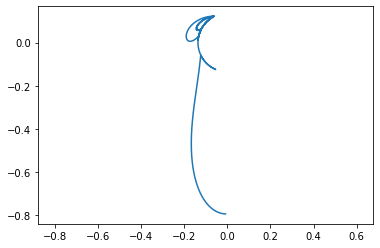

In [37]:
plt.plot(H[:,1],H[:,0])
plt.axis('equal')


### b: Show energies

Plot the total kinetic energy (T), total potential energy (U) and grand total energy (T+U) over
the course of the simulation.
